import os
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

$$
\renewcommand{\like}{{\cal L}}
\renewcommand{\loglike}{{\ell}}
\renewcommand{\err}{{\cal E}}
\renewcommand{\dat}{{\cal D}}
\renewcommand{\hyp}{{\cal H}}
\renewcommand{\Ex}[2]{E_{#1}[#2]}
\renewcommand{\x}{{\mathbf x}}
\renewcommand{\v}[1]{{\mathbf #1}}
$$

# Clinical Deterioration Prediction Model - KNN 

In [1]:
os.getcwd()

<IPython.core.display.Javascript object>

'C:\\Users\\abebu\\Dropbox\\Data Science\\Projects\\Capstone Project 1\\Potential Projects\\9. MIMIC\\Machine Learning'

In [5]:
os.chdir("C://Users/abebu/Google Drive/mimic-iii-clinical-database-1.4")

<IPython.core.display.Javascript object>

In [6]:
saps = pd.read_csv("saps_ts.csv", header=0, index_col=0)
saps.head()

<IPython.core.display.Javascript object>

,Unnamed: 0.1,Unnamed: 0.1.1,SUBJECT_ID,HADM_ID,ICUSTAY_ID,los,hdeath,death,admission,ud,...,Sodium,Temp,Bilirubin,WBC,hr,gcs,bp,AGE,UO,saps2
0,0,0,268,110404,280836,3.2490,1,1,8,0.0,...,0.0,0.0,0.0,0.0,11.0,26.0,13.0,12.0,0.0,82.0
1,1,1,269,106296,206613,3.2788,0,0,8,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,7.0,0.0,37.0
2,2,2,270,188028,220345,2.8939,0,0,0,0.0,...,0.0,3.0,0.0,0.0,11.0,0.0,13.0,18.0,0.0,45.0
3,3,3,271,173727,249196,2.0600,0,0,8,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,24.0
4,4,4,272,164716,210407,1.6202,0,0,8,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,5.0,12.0,0.0,28.0


In [7]:
list(saps.columns)

['Unnamed: 0.1',
 'Unnamed: 0.1.1',
 'SUBJECT_ID',
 'HADM_ID',
 'ICUSTAY_ID',
 'los',
 'hdeath',
 'death',
 'admission',
 'ud',
 'bun',
 'Bicarbonate',
 'ventilation',
 'Potassium',
 'Sodium',
 'Temp',
 'Bilirubin',
 'WBC',
 'hr',
 'gcs',
 'bp',
 'AGE',
 'UO',
 'saps2']

In [9]:
saps=saps.drop(['Unnamed: 0.1','Unnamed: 0.1.1'], axis=1)

In [10]:
# Create arrays for features and target variable
y = saps['hdeath'].values
X = saps[['admission', 'ud', 'bun', 'Bicarbonate', 'ventilation', 'Potassium', 'Sodium', 'Temp', 'Bilirubin', 'WBC', 'hr', 'gcs', 'bp', 'AGE', 'UO']].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
#y = y.reshape(-1, 1)
#X = X.reshape(-1, 1)

#Print the dimensions of X and y after reshaping
#print("Dimensions of y after reshaping: {}".format(y.shape))
#print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (61117,)
Dimensions of X before reshaping: (61117, 15)


In [7]:
X

array([[ 8.,  0.,  6., ..., 13., 12.,  0.],
       [ 8., 17.,  0., ...,  5.,  7.,  0.],
       [ 0.,  0.,  0., ..., 13., 18.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  5.,  7.,  0.],
       [ 0.,  0.,  0., ..., 13., 12.,  0.],
       [ 8.,  0.,  0., ...,  5.,  0.,  0.]])

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [12]:
# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
print("Prediction: {}".format(new_prediction))


Prediction: [0]


In [10]:
# Predict and print the label for the new data point X_new
new_prediction = knn.predict([[8,8,8,8,8,8,8,8,8,8,8,8,8,8,8]])
print("Prediction: {}".format(new_prediction))

Prediction: [1]


In [11]:
# Predict and print the label for the new data point X_new
new_prediction = knn.predict([[8,0,8,0,8,0,8,0,0,8,0,8,0,0,0]])
print("Prediction: {}".format(new_prediction))

Prediction: [0]


In [13]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

# Create a k-NN classifier with 10 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=10)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print('Training Accuracy: {}'.format(knn.score(X_train,y_train)))
print('Testing Accuracy: {}'.format(knn.score(X_test, y_test)))



Training Accuracy: 0.924405694116547
Testing Accuracy: 0.9198298429319371


In [15]:
from sklearn.metrics import accuracy_score
print('Training Accuracy: {}'.format((accuracy_score(knn.predict(X_train), y_train))))
print('Testing Accuracy: {}'.format((accuracy_score(knn.predict(X_test), y_test))))

Training Accuracy: 0.924405694116547
Testing Accuracy: 0.9198298429319371


In [13]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print('Training Accuracy: {}'.format(knn.score(X_train,y_train)))
print('Testing Accuracy: {}'.format(knn.score(X_test, y_test)))

Training Accuracy: 0.9249176773771296
Testing Accuracy: 0.9198298429319371


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

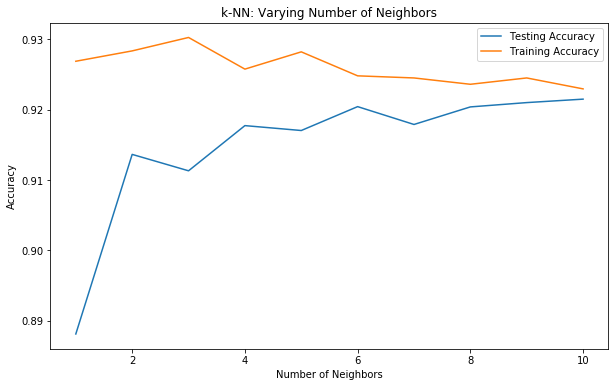

In [16]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.figure(figsize=(10,6))
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [15]:
# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier (n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification performance report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[21404   421]
 [ 1586  1036]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     21825
           1       0.71      0.40      0.51      2622

    accuracy                           0.92     24447
   macro avg       0.82      0.69      0.73     24447
weighted avg       0.91      0.92      0.91     24447



In the support column - the firgures represent the number of ICU patients in the test set on which 21,825 are ICU stay survivors and 2,622 are non-survivors (deceased). 

Our model shows 92% accuracy - represents the number of correctly classified (True positive and true negative) over the total number of data instances (true positive, false positive, true negative, and false negative). 

Precision (positive predicitve value) in classifying the data instances. Defined as true positive over true positive plus false positive. Our model have a 93% precision in classifying ICU stay survivors as survivors and a 71% precision classifying ICU patient deaths correctly. 

Recall (sensetivity or ture positive rate). Defined as true positive over true positive plus false negative. 100% recall means there is zero false negative. Our model have a high (98%) recall classifying ICU stay survivors (there only 2% false negative - survivors clasfied as deceased. Model sensetivity classifying deceased is only 40%, that is 60% fase negative - deceased classified as survivors. 

so, ideally in a good classifier, we want a metric that takes into account both precision and recall. We have f1-score for that. f1-score becomes high only if both precision and recall becomes high. Our model shows f1-score of 96% for classifying survivors and 51% classifying deceased. 